<a href="https://colab.research.google.com/github/Sanika-0144/Data-Science-DAI-101-/blob/main/DAI_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/tips (data for regression problem).csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])
data['time'] = label_encoder.fit_transform(data['time'])

In [4]:
X =data.drop(columns=['tip'])  # Features
y = data['tip'].values   # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Linear Regression

In [5]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)
for feature, coef in zip(X.columns, linear_reg.coef_):
         print(f"{feature}: {coef:.2f}")

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

total_bill: 0.08
sex: -0.05
smoker: -0.16
day: -0.07
time: 0.18
size: 0.24
Mean Squared Error: 1.3379754479546424
Mean Absolute Error: 0.7814314961726373
Linear Regression R2: 0.49160017509972354


# Ridge Regression

In [6]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
for feature, coef in zip(X.columns, ridge_reg.coef_):
         print(f"{feature}: {coef:.2f}")

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))


total_bill: 0.08
sex: -0.05
smoker: -0.15
day: -0.06
time: 0.17
size: 0.24
Mean Squared Error: 1.334778072154167
Mean Absolute Error: 0.7804507230703338
Ridge Regression R2: 0.4928151041924712


# Lasso Regression

In [7]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
for feature, coef in zip(X.columns, lasso_reg.coef_):
         print(f"{feature}: {coef:.2f}")

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))


total_bill: 0.08
sex: -0.02
smoker: -0.09
day: -0.00
time: 0.04
size: 0.23
Mean Squared Error: 1.3032593588206565
Mean Absolute Error: 0.7733807876079568
Lasso Regression R2: 0.5047914886353508


# DecisionTree Regression

In [8]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_tree)
mae = mean_absolute_error(y_test, y_pred_tree)
for feature, importance in zip(X.columns, tree_reg.feature_importances_):
         print(f"{feature}: {importance:.2f}")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))


total_bill: 0.81
sex: 0.02
smoker: 0.07
day: 0.05
time: 0.01
size: 0.05
Mean Squared Error: 1.8531959183673468
Mean Absolute Error: 1.0151020408163265
Decision Tree R2: 0.29582827409565027


# Forest Regression

In [9]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_forest)
mae = mean_absolute_error(y_test, y_pred_forest)
for feature, importance in zip(X.columns, forest_reg.feature_importances_):
         print(f"{feature}: {importance:.2f}")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


total_bill: 0.75
sex: 0.02
smoker: 0.07
day: 0.07
time: 0.01
size: 0.08
Mean Squared Error: 1.1794342063265304
Mean Absolute Error: 0.7705285714285711
Random Forest R2: 0.5518421919516927


Conclusion:
The most contributing features for each model based on the absolute highest coefficient or feature importance:
1. Linear Regression
Most Contributing Feature: size (0.24)

2. Ridge Regression
Most Contributing Feature: size (0.24)

3. Lasso Regression
Most Contributing Feature: size (0.23)

4. Decisiontree Regression
Most Contributing Feature: total_bill (0.78)

5. Random Forest
Most Contributing Feature: total_bill (0.73)

# SVR

In [10]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_test, y_pred_svr))

SVR R2: 0.3864647786866705


# KNN

In [11]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.39613598420612617


The R² score of each regression test is as follows:

1. Linear Regression = 0.48758172543494405
2. Ridge Regression =  0.49316592533721293
3. Lasso Regression =  0.5047911681435375
4. DecisionTree Regression = -0.009333537844595785
5. Forest Regression = 0.5546610212273702
6. SVR = 0.36369089851888636
7. KNN = 0.4464466999484903

Among all these tests Lasso Regression has the highest R² score.


# Scatter plot

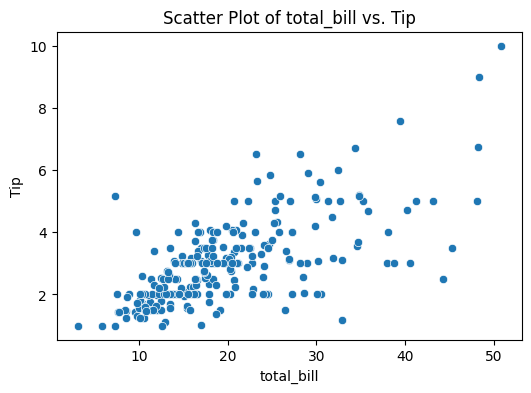

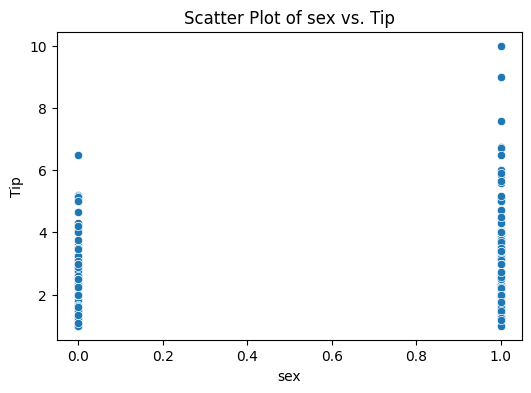

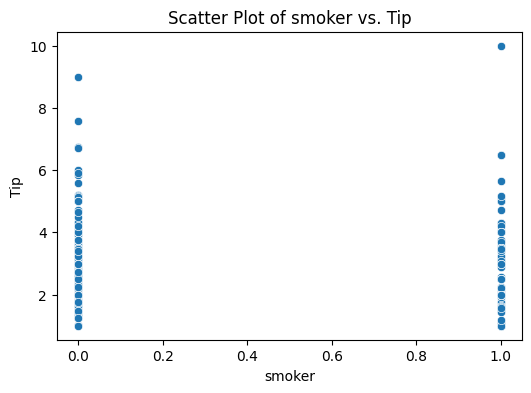

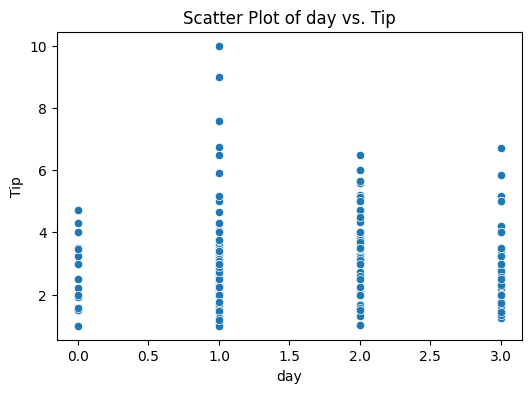

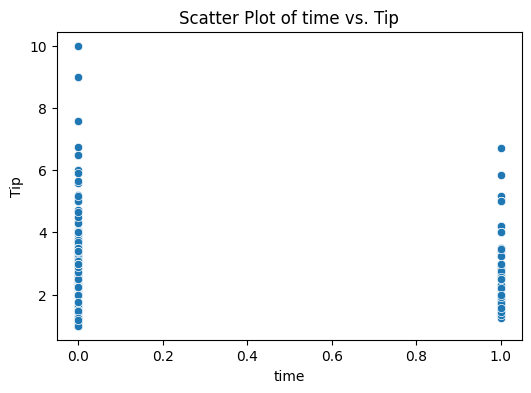

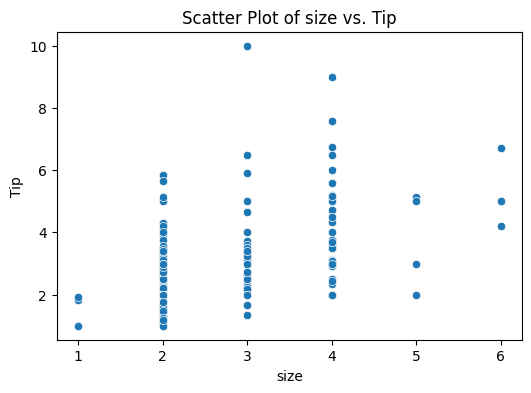

In [12]:
# Scatter plots to examine relationships between each feature and 'tip'
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[column], y=y)
    plt.title(f'Scatter Plot of {column} vs. Tip')
    plt.xlabel(column)
    plt.ylabel('Tip')
    plt.show()

# Pair Plot for multiple features

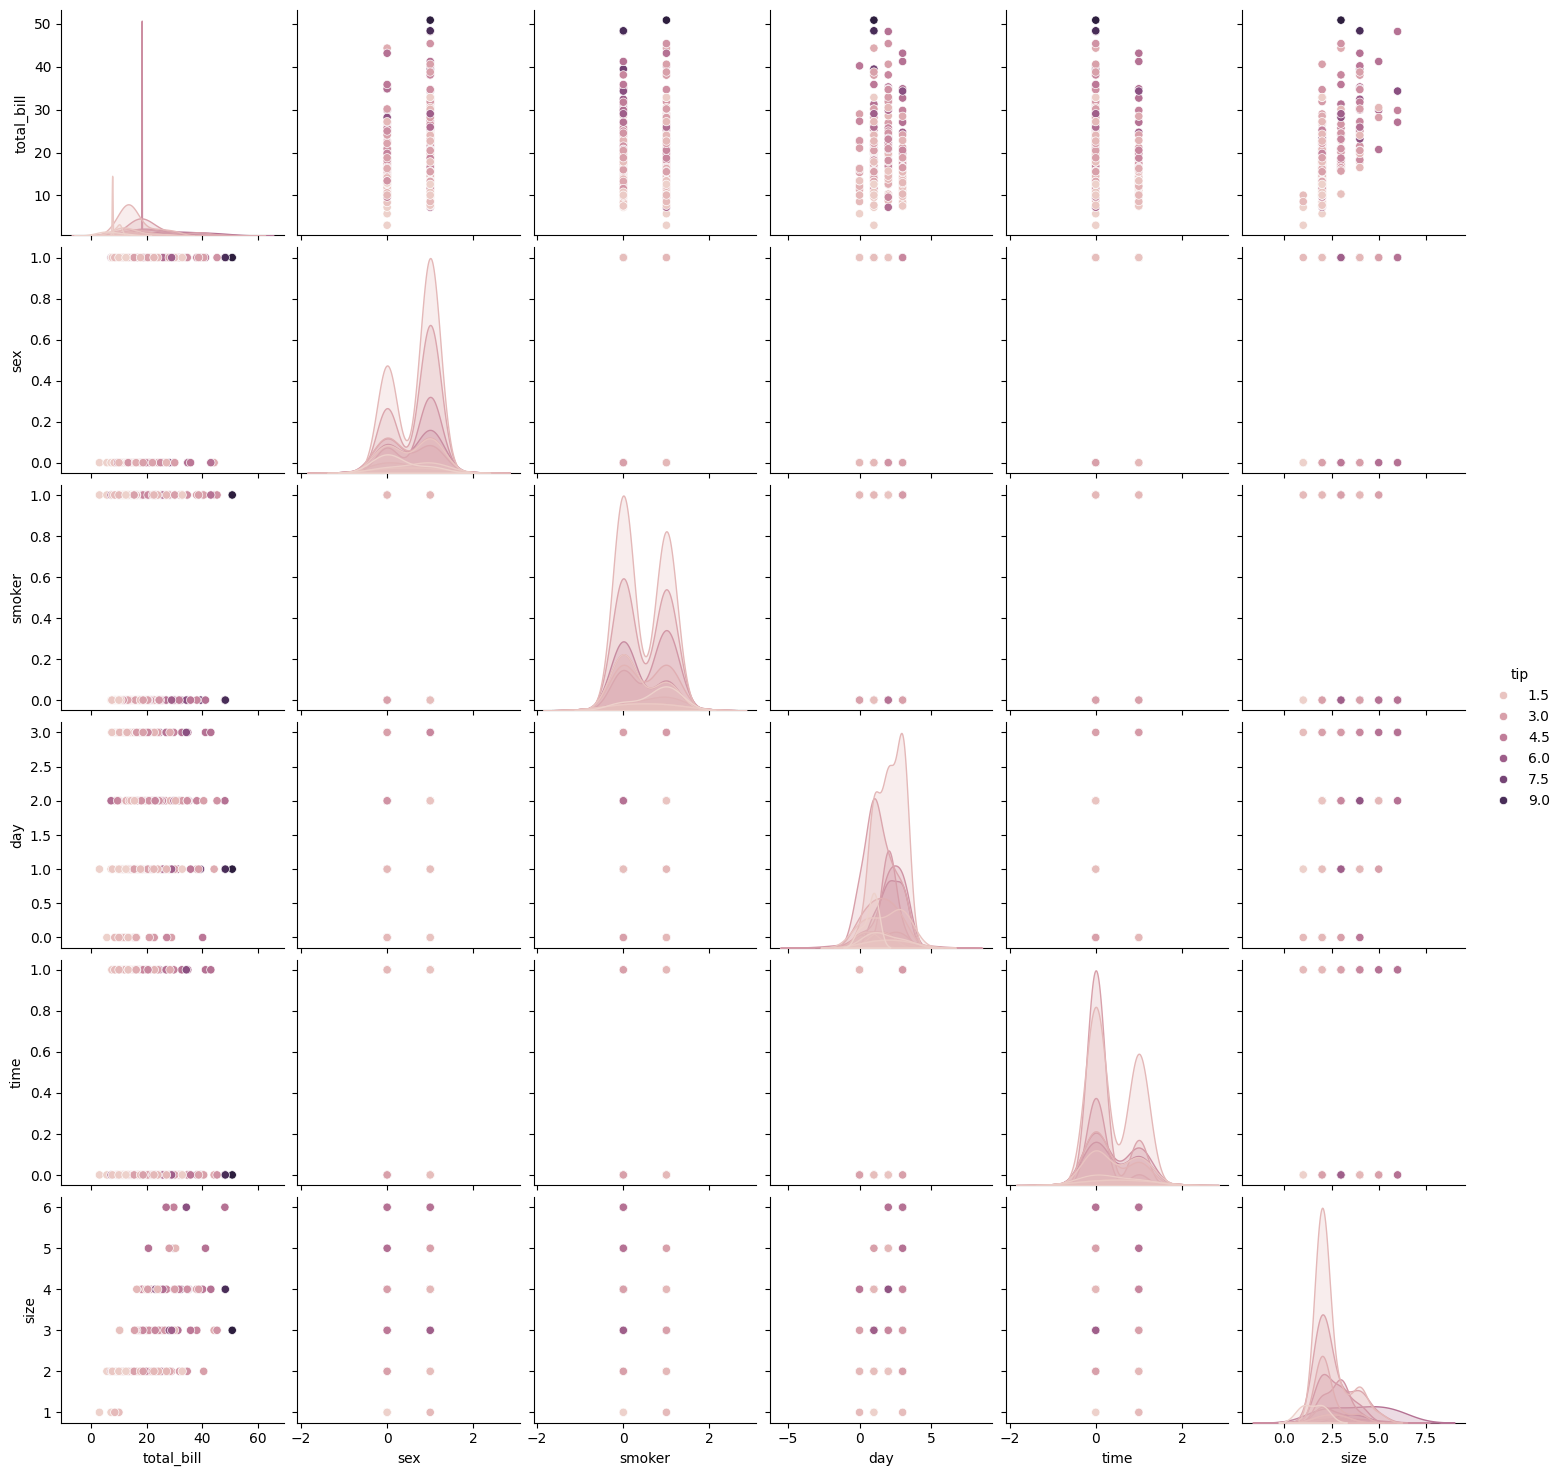

In [20]:
# Pair plot to visualize relationships between features and 'tip'
sns.pairplot(data, hue='tip', diag_kind='kde')
plt.show()

# Correlation Matrix ( Heatmap )

<Axes: >

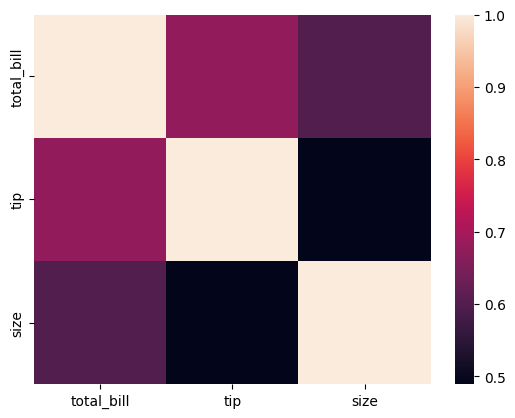

In [14]:
# Heatmap to show correlation between features and the target variable
data_corr = data[['total_bill', 'tip', 'size']].copy()
corr = data_corr.corr()
sns.heatmap(corr)

# Statistical test for linearity ( Rainbow test)

In [15]:
X = data[['total_bill', 'size']]  # Replace with relevant predictors
y = data['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print("Rainbow test p-value:", rainbow_p_val)
if rainbow_p_val < 0.05:
    print("Non-linearity detected (p < 0.05), consider non-linear models.")
else:
    print("Data appears linear (p >= 0.05).")


Rainbow test p-value: 0.17048935693447634
Data appears linear (p >= 0.05).


# Residual plot

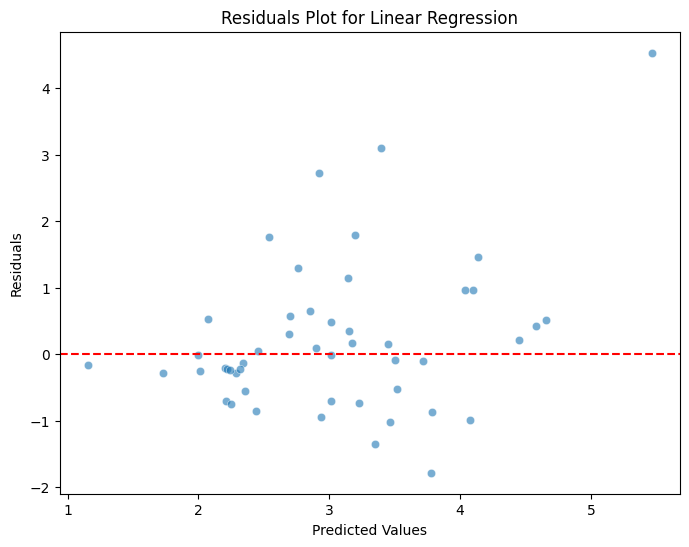

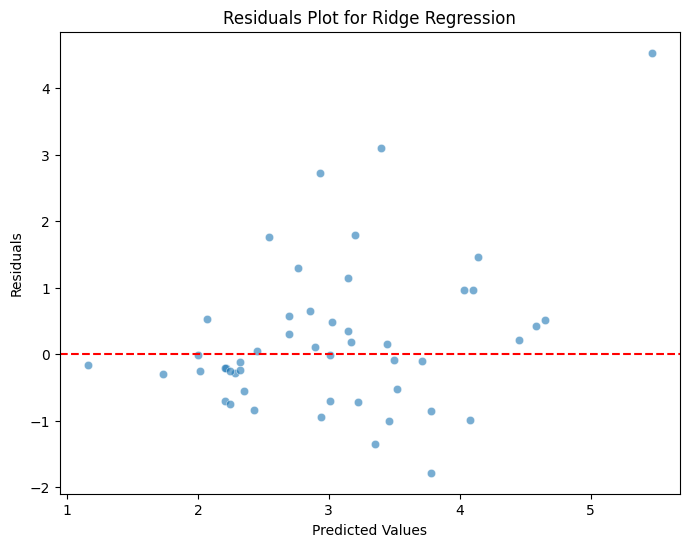

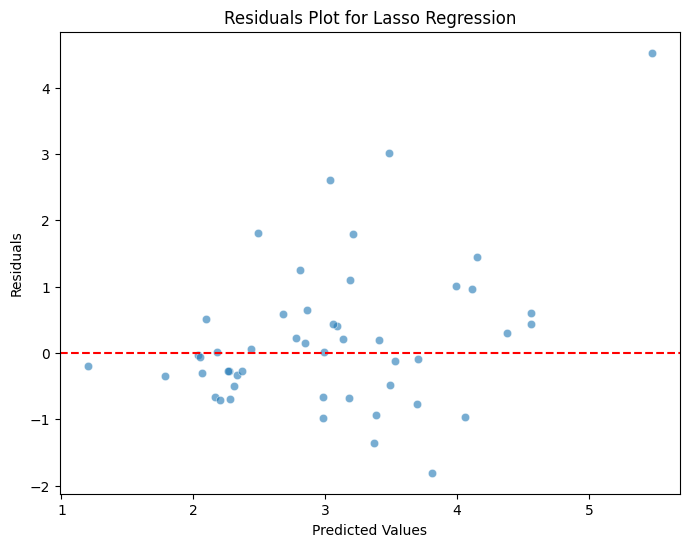

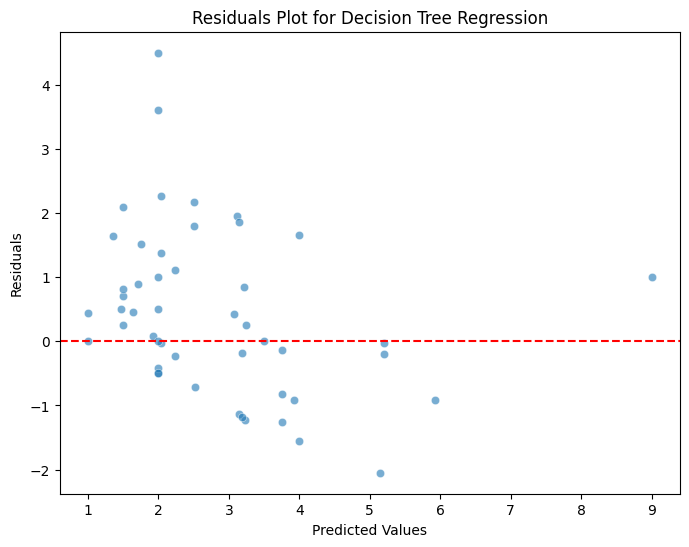

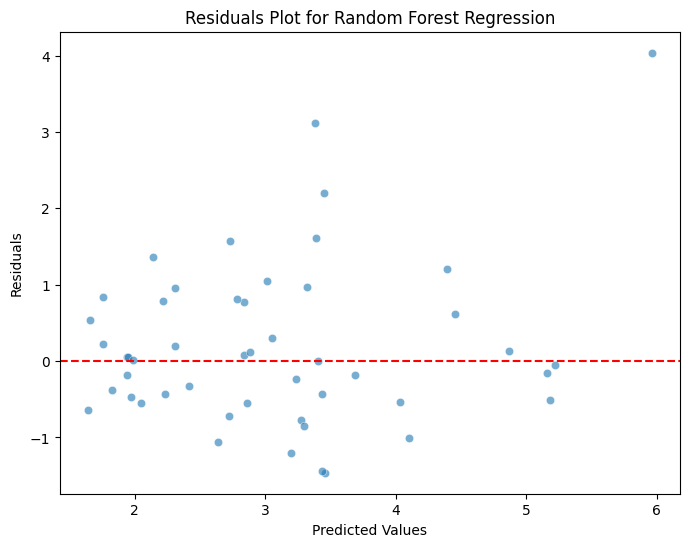

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


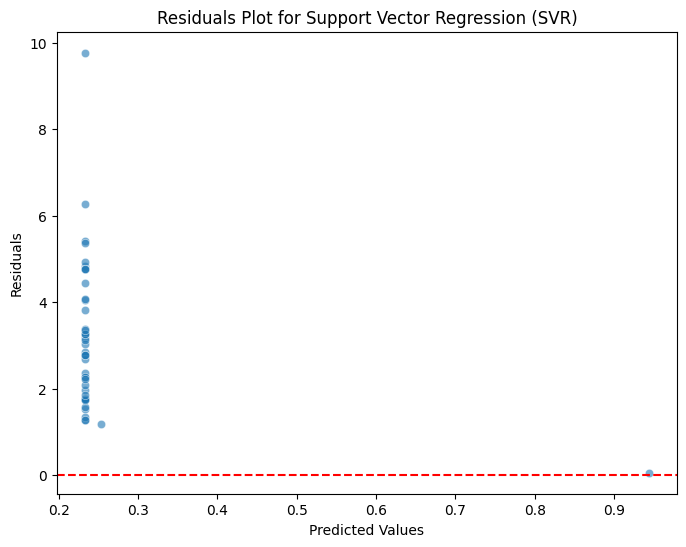

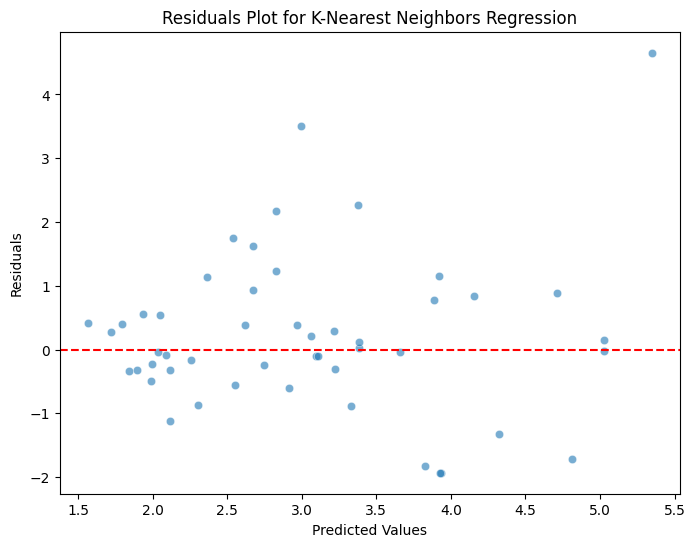

In [16]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_lr = linear_reg.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree_reg.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest_reg.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr_reg.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn_reg.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

# Line plot

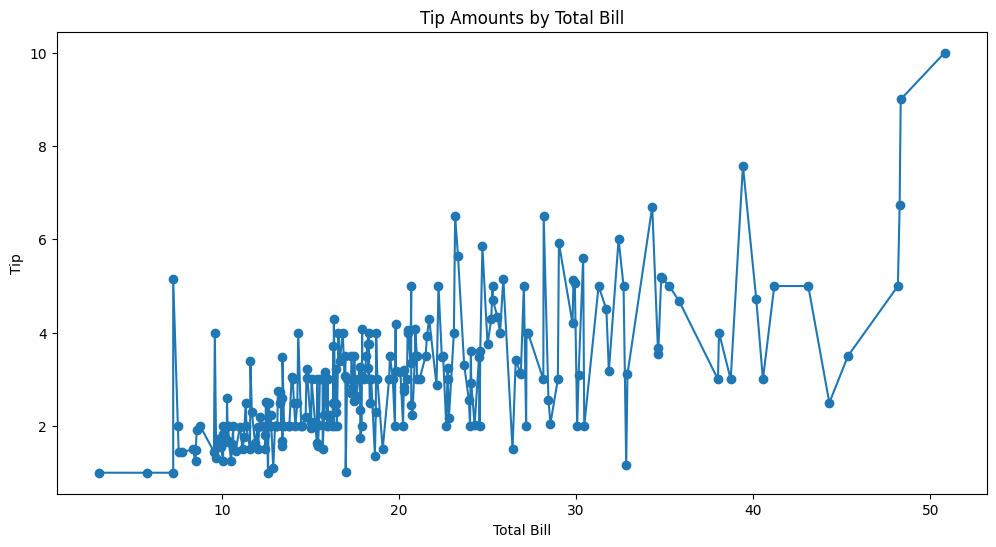

In [17]:
sorted_data = data.sort_values(by='total_bill')
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-')
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

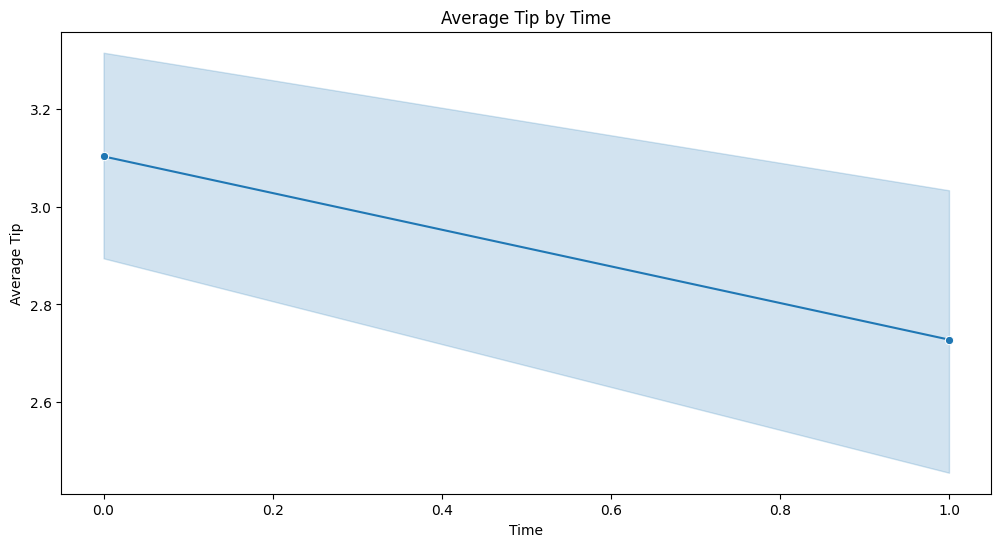

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="time", y="tip", marker="o")
plt.title("Average Tip by Time")
plt.xlabel("Time")
plt.ylabel("Average Tip")
plt.show()

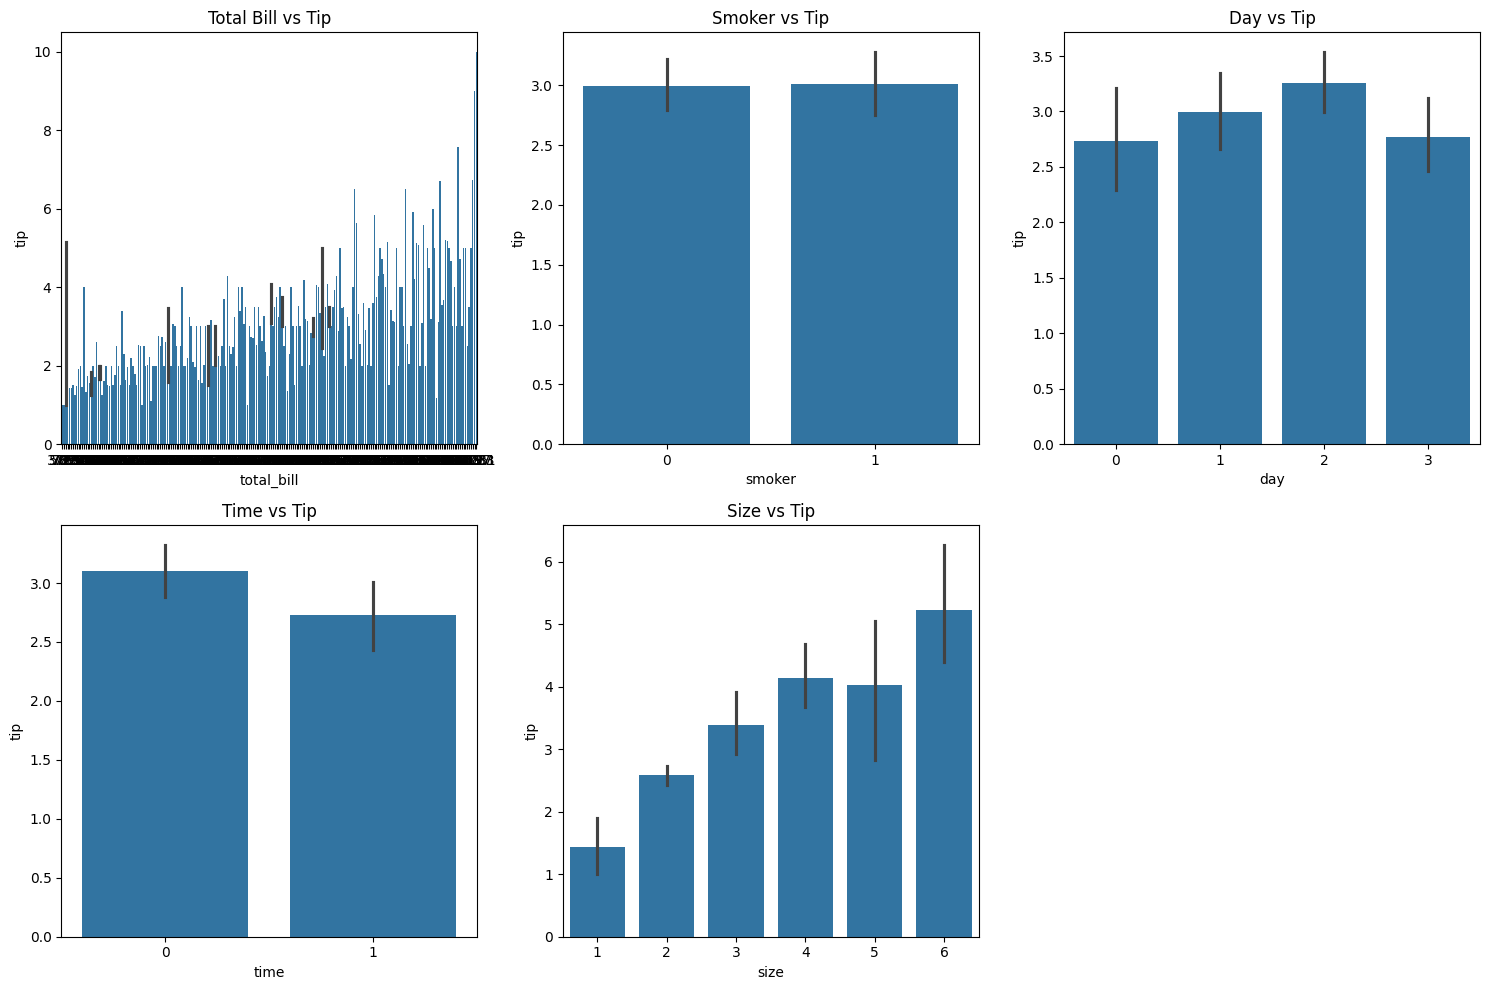

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# List of features for which we are plotting the barplots
features = ["total_bill", "smoker", "day", "time", "size"]
titles = ["Total Bill vs Tip", "Smoker vs Tip", "Day vs Tip", "Time vs Tip", "Size vs Tip"]

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the features and axes to create the barplots
for i, feature in enumerate(features):
    sns.barplot(x=data[feature], y=data["tip"], ax=axes[i])
    axes[i].set_title(titles[i])  # Set title for each subplot

# Turn off the last (unused) subplot
axes[5].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Insights on Management

### Encourage Upselling for Higher Tips
Since higher bills often lead to higher tips, focus on training staff to suggest premium options, special packages, and strategically design the menu to boost spending.

### Optimize Service for Larger Parties
Large groups generally leave bigger tips, so offer group deals and assign seasoned staff to ensure exceptional service, making the experience memorable and maximizing tips.

### Increase Weekend Engagement
Tips can drop slightly over weekends. Implement weekend specials or themed events to attract more diners, encouraging both higher spending and tipping.

### Create a Welcoming Environment for Non-Smokers
Tips from non-smokers tend to be higher. Designate appealing non-smoking sections and offer small incentives in these areas to encourage generous tipping.

### Adapt Service to Customer Demographics
Subtle differences in tipping behavior suggest potential in tailoring service by demographics. Train staff to adapt their approach based on customer profiles for a personalized experience.

### Speed Up Lunch Service
Tips are steady but lower during lunch hours. Introduce quick, convenient lunch options and value deals to attract more lunchtime customers and increase revenue.